# Finding the Ideal San Francisco Apartment

![title](https://i.insider.com/5dc353fc3afd376a713d0902?width=1900&format=jpeg&auto=jpg)

### Introduction 

Few changes in life are simultaneously as frightening, uncertain and exciting as moving to a new city for work or school, yet, historically, upwards of 40% of Americans moved to a new city over the course of their lifetime. While moving is often new and exciting, the process of selecting a new place to live is extremely challenging and poses serious financial risks, even in the best of circumstances.

When you arrive in a new city, you're not necessarily familiar with your surroundings, yet, you’re expected to make critical, long term decisions regarding housing and transportation with limited time and information. As a result, you might unknowingly rent an overpriced apartment. Or, rent a fairly priced apartment in the wrong neighborhood. Issues such as these are compounded when renters move to complex and competitive markets like the San Francisco apartment market. Renters looking to enter this market face a high stakes uphill battle with two primary challenges:


### Purpose

The purpose of this project is to provide new renters and those unfamiliar with the San Francisco real estate market with advanced analytics and resources, allowing them to: 

1.	Identify / sort desireable neighborhoods from undesireable neighborhood based on crime and venue data. (Part 1)
2.	Determine if a potential apartment or house is over or underpriced. (Part 2)



### Import statements 

In [33]:
from craigslist import CraigslistHousing
import pandas as pd
import numpy as np
import folium
import json
import requests 
import seaborn as sns
import plotly.figure_factory as ff
from urllib.request import urlopen
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', 50)
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from geopy.geocoders import Nominatim 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

print(__version__) # requires version >= 1.9.0

init_notebook_mode(connected=True)

4.5.2


# Identifying High Quality Neighborhoods - Part 1 

### Part 1: Identifying areas with low rates of crime 

To begin, we'll first focus on locating safe neighborhoods in San Francisco. Using data provided by the city of San Francisco, we'll examine all crimes taking place since Jan 1, 2020 to 

In [54]:
# subset of the original crime dataset and highlights all crimes taking place in 2020 
crime_filt = pd.read_csv('https://raw.githubusercontent.com/Brianmoore0/SF-Apartment-Finder/master/Static%20Data/sf_crime_2020.csv') 

#Static San Francisco Neighborhood names and locations 
sf_neh_df = pd.read_csv('https://raw.githubusercontent.com/Brianmoore0/SF-Apartment-Finder/master/Static%20Data/SF_neighborhood_data.csv')
sf_nh_df = pd.read_csv('https://raw.githubusercontent.com/Brianmoore0/Coursera_Capstone/master/SF_neighborhood_data.csv')

### Exploring Crime Data 

In [25]:
crime_by_neh = crime_filt.groupby(['Analysis Neighborhood']).count().sort_values(by=['Incident Count'], ascending=True)

del crime_by_neh['point'] # removing unnecessary columns 
del crime_by_neh['Incident Date']
del crime_by_neh['Incident Category']
sf_crime_comb = pd.merge(sf_neh_df, crime_by_neh, left_on='Neighborhood', right_on='Analysis Neighborhood' )
del sf_crime_comb['Unnamed: 0_x']
del sf_crime_comb['Unnamed: 0_y']

sf_crime_comb.sort_values(by=['Incident Count'], ascending=True)

,Neighborhood,Latitude,Longitude,Incident Count
13,McLaren Park,37.786270,-122.489248,29
23,Seacliff,37.788540,-122.486920,36
16,Lincoln Park,37.781590,-122.494410,62
34,Presidio,37.799480,-122.467270,71
36,Treasure Island,37.824890,-122.370870,92
6,Glen Park,37.738410,-122.430990,134
35,Presidio Heights,37.790280,-122.451660,184
37,Twin Peaks,37.756690,-122.442240,187
26,Oceanview/Merced/Ingleside,37.710121,-122.466961,259
24,Noe Valley,37.751600,-122.429080,297


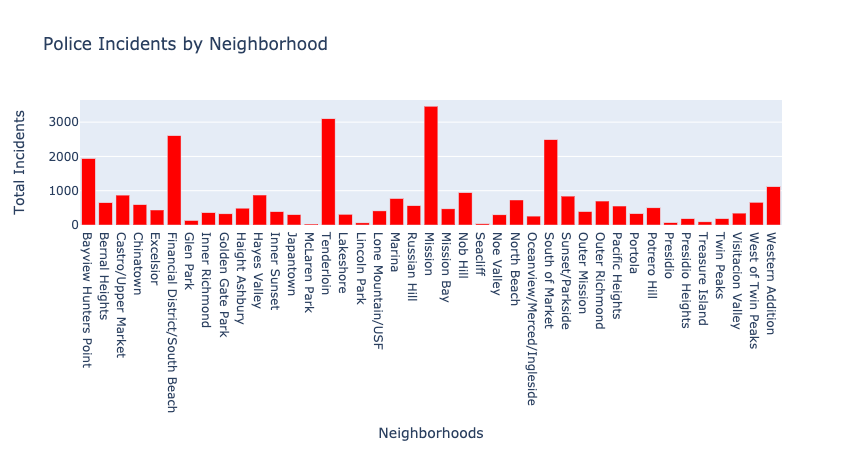

In [22]:
x = sf_crime_comb['Neighborhood'] #Neighborhood name 

trace0 = go.Bar(
    y=sf_crime_comb['Incident Count'], #Number of Incidents 
    x=x,
    marker=dict(
    color='Red'))

data = [trace0]

layout = go.Layout(
    
    title="Police Incidents by Neighborhood",
    xaxis_title="Neighborhoods",
    yaxis_title="Total Incidents",
    
    margin=dict( ),
    yaxis=dict(title='area (ft2)',zeroline=False))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Mapping Crime in San Francisco 

Graphically, it’s easy to identify neighborhoods with high rates of crime, however, this doesn’t tell the whole story because crime simply doesn’t end at the boundary of one neighborhood, nor begin at the boundary of another. As a result, I’ve utilized the Google Maps API to make an interactive heatmap (Figure 2) outlining precisely where police incidents have occurred. This data helps us identify good areas even in neighborhoods with statistically high levels of crime. Unfortunately, due to Google’s restrictions on the Maps API, I will not be including the code used to create the map in this notebook. Based on crime levels alone, it looks like: Pacific Heights, Height, Noe Valley, and Russian Hill look like great candidates for a safe living environment. 

![title](https://i.imgur.com/1T7py5x.jpg)

### Findings

### #2- Part 2: Identifying areas with high concentrations of "3rd places"

With the crime dataset analyzed, we’ll now layer venue data from foursquare. To pull venue data, I passed a data frame containing the list of neighborhoods from the crime dataset into a for loop designed to query Foursquare for 100 venues within the boundaries of each neighborhood located within the city of San Francisco. The data was then grouped by neighborhood yielding over 3,300 individual venues. After grouping, the data was OneHot Encoded. The resulting dataframe displays the types of venues and their density grouped by neighborhood. 

In [27]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('San Francisco Coordinates: {}, {}.'.format(latitude, longitude))

San Francisco Coordinates: 37.7790262, -122.4199061.


In [28]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, neighborhood in zip(sf_nh_df['Latitude'], sf_nh_df['Longitude'], sf_nh_df['Neighborhood'] ): #passing in Lat, lon and neighborhood name 
    label= '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sf)  
    
map_sf

### Pulling venues from Foursquare in SF 

In [31]:
CLIENT_ID = 'B5FDHGHAO3CYDCNC2N5GP4BTTKQEPQBFMIPJE0CMCS5AXUFH' # your Foursquare ID
CLIENT_SECRET = 'KC1VHVUYQO0RKME5PWQK434Z31CU0ABE45UCAVC0CNNVKYVP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B5FDHGHAO3CYDCNC2N5GP4BTTKQEPQBFMIPJE0CMCS5AXUFH
CLIENT_SECRET:KC1VHVUYQO0RKME5PWQK434Z31CU0ABE45UCAVC0CNNVKYVP


In [68]:
radius = 2000
LIMIT = 300

venues = []


for lat, long, neighborhood in zip(sf_nh_df['Latitude'], sf_nh_df['Longitude'],sf_nh_df['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [69]:
venues_df = pd.DataFrame(venues)
venues_df

,0,1,2,3,4,5,6
0,Bayview Hunters Point,37.73431,-122.37943,Archimedes Banya,37.730464,-122.372789,Spa
1,Bayview Hunters Point,37.73431,-122.37943,Speakeasy Ales & Lagers,37.738468,-122.380874,Brewery
2,Bayview Hunters Point,37.73431,-122.37943,TATO,37.736315,-122.390498,Mexican Restaurant
3,Bayview Hunters Point,37.73431,-122.37943,Flora Grubb Gardens,37.739589,-122.390171,Flower Shop
4,Bayview Hunters Point,37.73431,-122.37943,Radio Africa & Kitchen,37.734826,-122.390764,African Restaurant
...,...,...,...,...,...,...,...
3951,Western Addition,37.78095,-122.43222,La Biang Thai Massage,37.788738,-122.420442,Massage Studio
3952,Western Addition,37.78095,-122.43222,Saigon Sandwich,37.783084,-122.417650,Sandwich Place
3953,Western Addition,37.78095,-122.43222,Asian Art Museum,37.780178,-122.416505,Art Museum
3954,Western Addition,37.78095,-122.43222,Blue Bottle Coffee,37.792407,-122.434570,Coffee Shop


In [70]:
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(3956, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bayview Hunters Point,37.73431,-122.37943,Archimedes Banya,37.730464,-122.372789,Spa
1,Bayview Hunters Point,37.73431,-122.37943,Speakeasy Ales & Lagers,37.738468,-122.380874,Brewery
2,Bayview Hunters Point,37.73431,-122.37943,TATO,37.736315,-122.390498,Mexican Restaurant
3,Bayview Hunters Point,37.73431,-122.37943,Flora Grubb Gardens,37.739589,-122.390171,Flower Shop
4,Bayview Hunters Point,37.73431,-122.37943,Radio Africa & Kitchen,37.734826,-122.390764,African Restaurant


In [71]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Bayview Hunters Point,58,58,58,58,58,58
Bernal Heights,100,100,100,100,100,100
Castro/Upper Market,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Excelsior,100,100,100,100,100,100
Financial District/South Beach,100,100,100,100,100,100
Glen Park,100,100,100,100,100,100
Golden Gate Park,100,100,100,100,100,100
Haight Ashbury,100,100,100,100,100,100


In [76]:
sf_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix='', prefix_sep='')

sf_onehot["Neighborhoods"] = venues_df['Neighborhood']

fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1]) #one hot encoding columns 
sf_onehot = sf_onehot[fixed_columns]


print(sf_onehot.shape)
sf_onehot.head()

sf_grouped = sf_onehot.groupby(["Neighborhoods"]).mean().reset_index()
print(sf_grouped.shape)
sf_grouped.head()

(3956, 304)
(41, 304)


,Neighborhoods,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,...,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trade School,Trail,Train Station,Trattoria/Osteria,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfall,Waterfront,Weight Loss Center,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,Bayview Hunters Point,0.00,0.0,0.017241,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.017241,0.00,0.017241,0.00,0.0,0.0,0.00,0.0,0.034483,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.017241,0.0,0.0,0.0,0.00,0.017241,0.0,0.00,0.0,0.0
1,Bernal Heights,0.00,0.0,0.000000,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.01,0.0,0.0,0.00,0.0,0.030000,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.02,0.0,0.0
2,Castro/Upper Market,0.01,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.0,0.020000,0.0,0.00,0.00,0.0,0.0,...,0.01,0.0,0.01,0.0,0.01,0.00,0.03,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.0,0.0,0.02,0.010000,0.0,0.02,0.0,0.0
3,Chinatown,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.000000,0.01,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.01,0.02,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.0,0.0,0.04,0.010000,0.0,0.01,0.0,0.0
4,Excelsior,0.00,0.0,0.000000,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,0.01,0.0,0.040000,0.0,0.03,0.01,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0


In [77]:
sf_dim_sum = sf_grouped[['Neighborhoods', 'Park', 'Gym', 'Coffee Shop']] #venues we'll be clustering 
sf_dim_sum.head()

,Neighborhoods,Park,Gym,Coffee Shop
0,Bayview Hunters Point,0.051724,0.017241,0.068966
1,Bernal Heights,0.030000,0.000000,0.060000
2,Castro/Upper Market,0.100000,0.010000,0.090000
3,Chinatown,0.050000,0.040000,0.070000
4,Excelsior,0.060000,0.010000,0.060000


In [78]:
from sklearn.cluster import KMeans
kclusters = 7

sf_clustering = sf_dim_sum.drop(["Neighborhoods"], 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_clustering)

kmeans.labels_[0:10] 

array([3, 5, 1, 6, 3, 4, 3, 1, 1, 4], dtype=int32)

In [79]:
sf_merged = sf_dim_sum.copy()

sf_merged["Cluster Labels"] = kmeans.labels_

sf_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
sf_merged.sort_values(by=['Park'], ascending=False)

sf_merged = pd.merge(sf_merged, sf_nh_df, on='Neighborhood')

sf_merged.rename(columns={'Latitude_x' : 'Latitude'}, inplace=True)
sf_merged.rename(columns={'Longitude_x' : 'Longitude'}, inplace=True)

del sf_merged['Unnamed: 0']

display(sf_merged.head())
print(sf_merged.shape)

,Neighborhood,Park,Gym,Coffee Shop,Cluster Labels,Latitude,Longitude
0,Bayview Hunters Point,0.051724,0.017241,0.068966,3,37.73431,-122.37943
1,Bernal Heights,0.030000,0.000000,0.060000,5,37.73903,-122.41621
2,Castro/Upper Market,0.100000,0.010000,0.090000,1,37.76122,-122.44411
3,Chinatown,0.050000,0.040000,0.070000,6,37.79539,-122.40812
4,Excelsior,0.060000,0.010000,0.060000,3,37.72104,-122.43160


(41, 7)


In [80]:
sf_merged['Park Score'] = (sf_merged['Park'] /sf_merged['Park'].max())*100
sf_merged['Gym Score'] = (sf_merged['Gym'] /sf_merged['Gym'].max())*100
sf_merged['Coffee Shop Score'] = (sf_merged['Coffee Shop'] /sf_merged['Coffee Shop'].max())*100
sf_merged['Totals'] = sf_merged['Park Score'] + sf_merged['Gym Score'] +sf_merged['Coffee Shop Score']
sf_merged.sort_values(by=['Park Score'], ascending=False)

,Neighborhood,Park,Gym,Coffee Shop,Cluster Labels,Latitude,Longitude,Park Score,Gym Score,Coffee Shop Score,Totals
2,Castro/Upper Market,0.100000,0.010000,0.090000,1,37.761220,-122.444110,100.000000,13.500000,81.818182,195.318182
39,West of Twin Peaks,0.100000,0.000000,0.050000,1,37.750178,-122.447672,100.000000,0.000000,45.454545,145.454545
8,Haight Ashbury,0.100000,0.010000,0.070000,1,37.769930,-122.446920,100.000000,13.500000,63.636364,177.136364
16,Marina,0.100000,0.030000,0.040000,1,37.803370,-122.436930,100.000000,40.500000,36.363636,176.863636
31,Russian Hill,0.100000,0.020000,0.030000,1,37.802030,-122.419630,100.000000,27.000000,27.272727,154.272727
37,Twin Peaks,0.080000,0.010000,0.060000,1,37.756690,-122.442240,80.000000,13.500000,54.545455,148.045455
7,Golden Gate Park,0.080000,0.010000,0.070000,1,37.771440,-122.454140,80.000000,13.500000,63.636364,157.136364
11,Inner Sunset,0.080000,0.010000,0.040000,1,37.762110,-122.468860,80.000000,13.500000,36.363636,129.863636
38,Visitacion Valley,0.070423,0.000000,0.014085,2,37.713070,-122.409310,70.422535,0.000000,12.804097,83.226633
14,Lincoln Park,0.070000,0.000000,0.020000,2,37.781590,-122.494410,70.000000,0.000000,18.181818,88.181818


### Mapping the final results 

Once the neighborhoods were clustered, I plotted the neighborhoods on a map and examined their characteristics, shown in figure 3 below. 
Once plotted, I examined the resulting clusters and found that clusters 2 (blue) and 0 (red) 
contained the highest quantities of park venues with adequate densities of gyms as well as coffee shops. Cluster 2 Neighborhoods consisted of: Haight, Twin Peaks, Golden gate park, and Castro/ Upper Market. Cluster 0 Neighborhoods contained: Visitacion Valley, Russian Hill, Presido, and others. Based on these results, I’m confident that any of the neighborhoods mentioned above will contain a variety of quality parks, coffee shops and gyms. With a viable list of candidate neighborhoods identified, it’s now time to explore the 2nd part of the analysis: finding fairly priced apartments located in the neighborhoods above. 


In [81]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Identifying Over/Underpriced Apartiments in SF - Part 2 

### Scraping Craigslist for Apartiments in SF 

The code below contains the script used to scrape craigslist listings in San Francisco. As configured, a full scrape takes over 10 miniuts to complete. As a result, i've cached the resutls of a previously scraped dataset (sf_cl_df) to save time. 

In [219]:
#cl = CraigslistHousing(
    #site='sfbay', 
    #area='sfc', 
    #category='apa',
    #filters={'max_price': 10000, 'min_price':1000})


#results = cl.get_results(sort_by='newest', geotagged=True, limit=2000, include_details=True)


In [220]:
#sf_cl_df = pd.DataFrame.from_dict(results)

In [221]:
#geo_temp = sf_cl_df['geotag'].to_list()

#geo_df = pd.DataFrame(geo_temp, columns=['Latitude', 'Longitude'])

#sf_cl_df['Latitude'] = geo_df['Latitude']
#sf_cl_df['Longitude'] = geo_df['Longitude']


#sf_cl_df

In [222]:
#cl_backup = sf_cl_df.copy()

In [223]:
#cl_backup.to_csv('/Users/brianmoore/Documents/Jupyter Notebook Projects/IBM Python Tutorial notebooks/Capstone/Coursera_Capstone/Craigslist Data/Craigslist_Sf_4.1.20.csv', index=False)

### Cleaning the static Craigslist DF 

In [5]:
sf_cl_df = pd.read_csv('https://raw.githubusercontent.com/Brianmoore0/SF-Apartment-Finder/master/Static%20Data/Craigslist_Sf_4.1.20.csv')
#this dataframe contains the raw data scraped from Craigslist 

Cleaning the Craigslist Data 

In [25]:
sf_cl_df['datetime'] = pd.to_datetime(sf_cl_df['datetime']) #setting datetime columns to datetime object 
sf_cl_df['last_updated'] = pd.to_datetime(sf_cl_df['last_updated'])#setting datetime columns to datetime object 
sf_cl_df['created'] = pd.to_datetime(sf_cl_df['created'])#setting datetime columns to datetime object 
sf_cl_df.astype({'bedrooms': 'float64'}, inplace=True)#setting bedroom columns to numeric object 

sf_cl_df['price'] = sf_cl_df['price'].str.slice(1, 10) #Price data is scraped as a string with a hardcoded "$" in front of each price. This code eliminates all hardcoded "$"
sf_cl_df['price'] = sf_cl_df['price'].astype('int64') #setting string values in pricing column as int 

# DROPPING ALL LISTINGS WITHOUT AREA, BEDROOMS, AND BATHROOMS + creating a new data frame 
for i in sf_cl_df:
    sf_cl_area = sf_cl_df.dropna(subset=['area', 'bedrooms', 'bathrooms'], axis=0)
# DROPPING ALL LISTINGS WITHOUT AREA, BEDROOMS, AND BATHROOMS + creating a new data frame 
    
    

sf_cl_area['area'] = sf_cl_area['area'].map(lambda x: x.strip('ft2')) #stripping the "Ft2" away from numeric values 
sf_cl_area['area'] = sf_cl_area['area'].astype('int64') #setting area column as int


sf_cl_area['Price Per Room'] = sf_cl_area['price'] / sf_cl_area['bedrooms'] #creating a new column: price per room 

numeric_cols = ['price', 'area', 'Latitude', 'Longitude'] #assigning numaric columns to an object 

for col in numeric_cols:
    sf_cl_area[col] = sf_cl_area[col].astype(float) # ensureing all numaric columns have a DType of float 


### Exploring the Craigslist Dataset - Initial findings 

Now that the data is cleaned, lets see what it looks like: 

In [70]:
sf_cl_area.head()

,id,repost_of,name,url,datetime,last_updated,price,where,has_image,geotag,body,created,images,attrs,cats_ok,dogs_ok,no_smoking,housing_type,laundry,parking,bedrooms,bathrooms,area,available,ev_charging,is_furnished,wheelchair_acccess,Latitude,Longitude,Price Per Room
0,7104948144,NaN,"One Month Free, Do a Virtual Tour Today! 1bd/1ba",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 14:20:00,2020-04-07 14:20:00,2800.0,lower nob hill,True,"(37.788251, -122.416257)",AVA Nob Hill is a new type of living space in ...,2020-04-07 14:16:00,[],"['1BR / 1Ba', '528ft2', 'available apr 8', 'ca...",True,True,True,apartment,laundry in bldg,attached garage,1.0,1,528.0,apr 8,NaN,NaN,NaN,37.788251,-122.416257,2800.0
5,7104921736,NaN,"Spectacular Views in Every Direction, Take a V...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 14:13:00,2020-04-07 14:13:00,4673.0,SOMA / south beach,True,"(37.787213, -122.391949)","399 Fremont, managed by UDR\n399 Fremont St.\n...",2020-04-07 13:29:00,[],"['1BR / 1Ba', '790ft2', 'EV charging', 'cats a...",True,True,True,apartment,w/d in unit,NaN,1.0,1,790.0,NaN,True,NaN,NaN,37.787213,-122.391949,4673.0
8,7102094273,NaN,Two Bedroom 2x2 at Avalon Dogpatch. Apt 224. O...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 14:11:00,2020-04-07 14:11:00,4270.0,Dogpatch,True,"(37.758942, -122.391644)",**One month's rent free if move in by 4/15**\n...,2020-04-01 12:29:00,[],"['2BR / 2Ba', '1006ft2', 'available apr 1', 'a...",True,True,True,apartment,w/d in unit,NaN,2.0,2,1006.0,apr 1,NaN,NaN,NaN,37.758942,-122.391644,2135.0
14,7104942506,NaN,Spacious Studio w/Patio | APPLY TODAY & GET 1 ...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 14:10:00,2020-04-07 14:10:00,2480.0,potrero hill,True,"(37.755879, -122.388061)",Welcome Home To Windsor at Dogpatch!\n\nCall ...,2020-04-07 14:06:00,[],"['0BR / 1Ba', '463ft2', 'available apr 7', 'EV...",True,True,True,apartment,w/d in unit,detached garage,0.0,1,463.0,apr 7,True,NaN,NaN,37.755879,-122.388061,inf
16,7102096795,NaN,"2 bedroom, 2 bath with offer at Avalon Mission...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 14:09:00,2020-04-07 14:09:00,4170.0,SOMA / south beach,True,"(37.777138, -122.39305)",We believe elevating where you live is about b...,2020-04-01 12:34:00,[],"['2BR / 2Ba', '1006ft2', 'available apr 1', 'a...",NaN,NaN,NaN,apartment,NaN,NaN,2.0,2,1006.0,apr 1,NaN,NaN,NaN,37.777138,-122.393050,2085.0


Just for fun, lets see what the highest priced apartimens in SF look like: 

In [26]:
sf_cl_area.loc[(sf_cl_area['price'] >= 8000)].sort_values(by=['price'], ascending=False)

,id,repost_of,name,url,datetime,last_updated,price,where,has_image,geotag,body,created,images,attrs,cats_ok,dogs_ok,no_smoking,housing_type,laundry,parking,bedrooms,bathrooms,area,available,ev_charging,is_furnished,wheelchair_acccess,Latitude,Longitude,Price Per Room
678,7103432992,7.061273e+09,Luxury View Penthouse Apartment,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 09:27:00,2020-04-07 09:27:00,9999.0,north beach / telegraph hill,True,"(37.803755, -122.410011)",San Francisco’s perfect location for your exte...,2020-04-04 10:18:00,[],"['3BR / 2.5Ba', '1750ft2', 'furnished', 'apart...",NaN,NaN,True,apartment,w/d in unit,attached garage,3.0,2.5,1750.0,NaN,NaN,True,NaN,37.803755,-122.410011,3333.000000
1909,7104273861,6.957697e+09,Cow Hollow Penthouse Condo | 3br | 2ba | prkg ...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-06 09:34:00,2020-04-06 09:34:00,9995.0,marina / cow hollow,True,"(37.796668, -122.431279)",Cow Hollow Full Floor Penthouse Condo \n\n ...,2020-04-06 09:30:00,[],"['3BR / 2Ba', '2200ft2', 'application fee deta...",True,True,NaN,condo,w/d in unit,attached garage,3.0,2,0.0,NaN,NaN,NaN,NaN,37.796668,-122.431279,3331.666667
612,7104781568,7.097032e+09,Spacious Home with a view,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-07 09:54:00,2020-04-07 09:54:00,9995.0,north beach / telegraph hill,True,"(37.801985, -122.404413)",A BREATH OF FRESH AIR: A rare opportunity to r...,2020-04-07 09:42:00,[],"['3BR / 3Ba', '1800ft2', 'application fee deta...",True,True,NaN,flat,w/d in unit,no parking,3.0,3,1800.0,NaN,NaN,NaN,NaN,37.801985,-122.404413,3331.666667
1438,7104359588,7.097032e+09,Spacious Home with a view,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-06 12:04:00,2020-04-06 12:04:00,9995.0,north beach / telegraph hill,True,"(37.801985, -122.404413)",A BREATH OF FRESH AIR: A rare opportunity to r...,2020-04-06 11:44:00,[],"['3BR / 3Ba', '1800ft2', 'application fee deta...",True,True,NaN,flat,w/d in unit,no parking,3.0,3,1800.0,NaN,NaN,NaN,NaN,37.801985,-122.404413,3331.666667
1618,7104336494,7.086767e+09,Single Family Home ~ 3BD+Office/3BA/2-Car Gar ...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-06 11:12:00,2020-04-06 11:12:00,9900.0,pacific heights,True,"(37.78982, -122.434161)","IF YOU ARE INQUIRING ABOUT THIS PROPERTY, PLEA...",2020-04-06 11:08:00,[],"['3BR / 3Ba', '2944ft2', 'available apr 6', 'c...",True,True,NaN,house,w/d in unit,attached garage,3.0,3,944.0,apr 6,NaN,NaN,NaN,37.789820,-122.434161,3300.000000
926,7099453451,NaN,On Floors 26-32 - Only a Handful Remain,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-06 20:09:00,2020-04-06 20:09:00,9900.0,downtown / civic / van ness,True,"(37.773641, -122.418433)","FIFTEEN FIFTY\n\nBold, artistic and original, ...",2020-03-26 17:39:00,[],"['3BR / 2Ba', '1445ft2', 'available jun 15', '...",True,True,True,apartment,w/d in unit,valet parking,3.0,2,1445.0,jun 15,True,NaN,True,37.773641,-122.418433,3300.000000
1616,7094682115,7.075555e+09,"Extraordinary 3-level house, amazing views, 4b...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-06 11:12:00,2020-04-06 11:12:00,9500.0,cole valley / ashbury hts,True,"(37.757399, -122.451725)",Mazal55Properties\n\nOffered unfurnished.\n\nT...,2020-03-17 06:46:00,[],"['4BR / 3Ba', '2500ft2', 'available mar 17', '...",True,True,NaN,house,w/d in unit,attached garage,4.0,3,500.0,mar 17,NaN,NaN,NaN,37.757399,-122.451725,2375.000000
1147,7098724533,6.977901e+09,Millennium Tower Super ultra luxurious condo. ...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-04-06 15:28:00,2020-04-06 15:28:00,9500.0,SOMA / south beach,True,"(37.791153, -122.395813)",REALTOR Gustavo López DRE# 01849175\n\nRENTED ...,2020-03-25 09:44:00,[],"['2BR / 2Ba', '1708ft2', 'application fee deta...",NaN,NaN,True,condo,w/d in unit,valet parking,2.0,2,1708.0,NaN,NaN,NaN,NaN,37.791153,-122.395813,4750.000000
1482,7090515906,6.828129e+09,Exquisite Luxury Penthouse,https://sfbay.c

### Apartiment Area Histogram 

Regardless of price, apartiments and houses in San Francisco are pretty small.

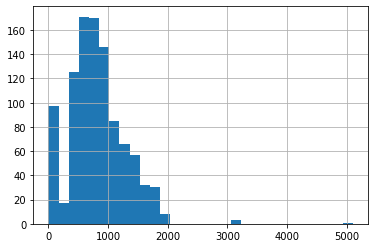

In [315]:
sf_cl_area['area'].hist(bins=30)

### Apartiment Price Histogram (SqFt)

Based on the historgram below, the apartiment prices appear to loosely follow a normal distrubition

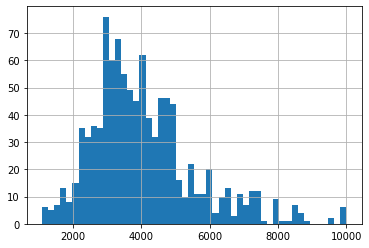

In [27]:
sf_cl_area['price'].hist(bins=50)

### Listings By Neighborhood 

In [277]:
sf_cl_area['where'].value_counts().head(30) # counting listings by neighborhood 

SOMA / south beach              227
mission district                 79
downtown / civic / van ness      63
hayes valley                     60
potrero hill                     40
nob hill                         39
lower pac hts                    35
pacific heights                  34
lower nob hill                   33
russian hill                     28
marina / cow hollow              27
bayview                          24
castro / upper market            22
inner sunset / UCSF              21
north beach / telegraph hill     20
alamo square / nopa              20
richmond / seacliff              20
noe valley                       18
ingleside / SFSU / CCSF          16
excelsior / outer mission        15
financial district               15
sunset / parkside                13
inner richmond                   11
Dogpatch                          9
bernal heights                    9
San Francisco                     8
twin peaks / diamond hts          8
cole valley / ashbury hts   

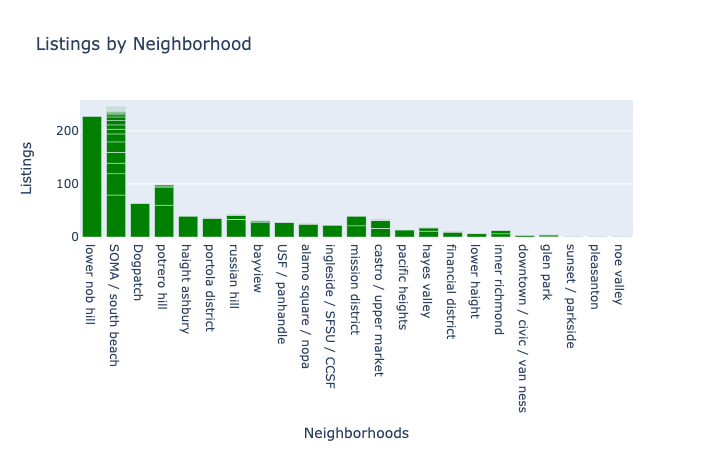

In [255]:

x = sf_cl_area['where'] #neighborhoods 

trace0 = go.Bar(
    y=sf_cl_area['where'].value_counts().values,
    x=x,
    
    marker=dict(
        color='green'
    )
)

data = [trace0]

layout = go.Layout(
    title="Listings by Neighborhood",
    xaxis_title="Neighborhoods",
    yaxis_title="Listings",
    
    
    yaxis=dict(
        title='Avaliable Apartiment Listings',
        tickformat="1,f",    
    )   
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Examining Rent by Neighborhood 

The graph below illustrates the mean, median, upper as well as lower pricing bounds across all neighborhoods in the city. This is an essential graph that provides valuable context and clarity in the rental market. Examining the neighborhoods discussed earlier, we can observe that neighborhoods like: Russian Hill, Haight and Pacific heights contain listings with a mean rental prices greater than that of the San Francisco Market as a whole. 

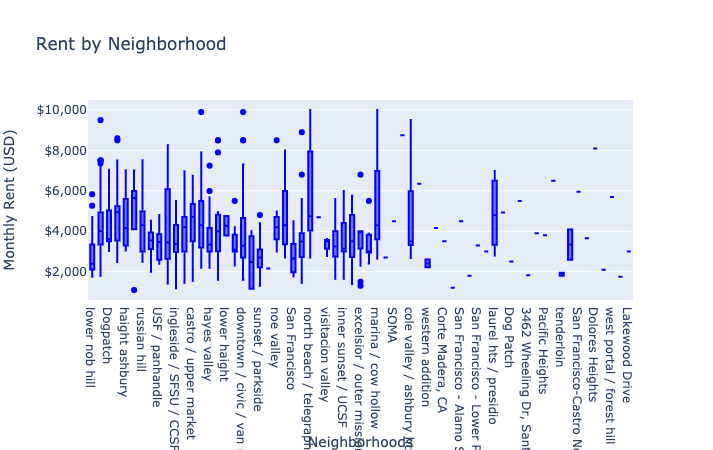

In [267]:

x = sf_cl_area['where']

trace0 = go.Box(
    y=sf_cl_area['price'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]

layout = go.Layout(
    
    title="Rent by Neighborhood",
    xaxis_title="Neighborhoods",
    yaxis_title="Monthly Rent (USD)",
    
    margin=dict( b=150),
    yaxis=dict(
        title='rental prices',
        tickformat="$1,f",
        zeroline=False
    ),
    boxmode='group',
    
)



fig = go.Figure(data=data, layout=layout)
iplot(fig)

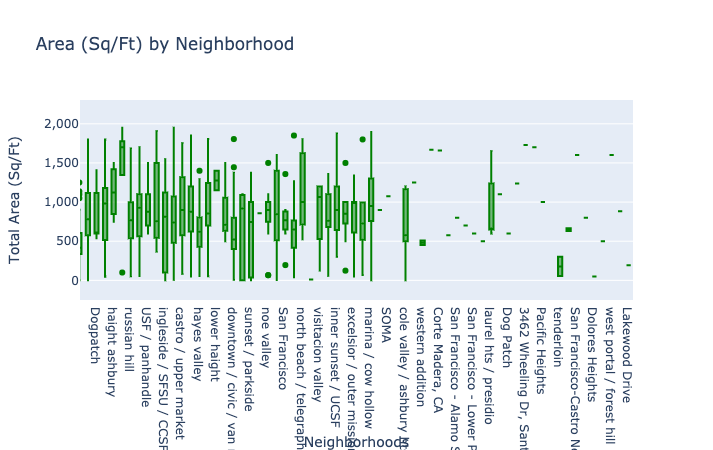

In [268]:

x = sf_cl_area['where']

trace0 = go.Box(
    y=sf_cl_area['area'],
    x=x,
    name='kale',
    marker=dict(
        color='green'
    )
)

data = [trace0]

layout = go.Layout(
    
    title="Area (Sq/Ft) by Neighborhood",
    xaxis_title="Neighborhoods",
    yaxis_title="Total Area (Sq/Ft)",
    
    margin=dict( b=150),
    
    
    
    
    yaxis=dict(
        title='area (ft2)',
        tickformat="1,f",
        zeroline=False
    ),
    boxmode='group',
    
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

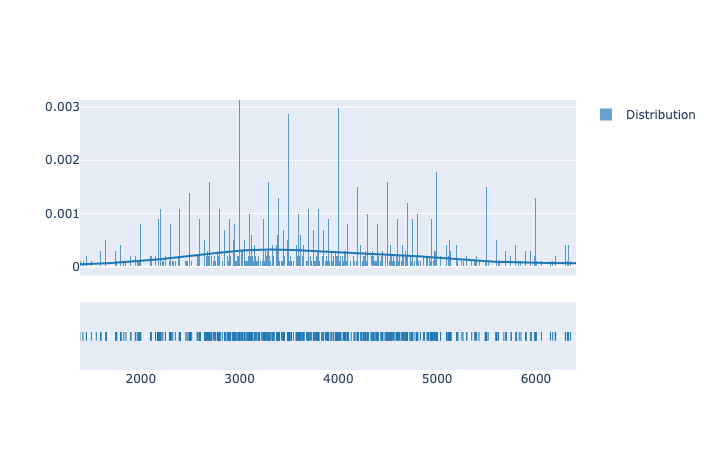

In [271]:
hist_data = [sf_cl_area['price']]
group_labels = ['Distribution']


layout = go.Layout(
    
    title="Area (Sq/Ft) by Neighborhood",
    xaxis_title="Neighborhoods",
    yaxis_title="Total Area (Sq/Ft)")

fig = ff.create_distplot(hist_data, group_labels, bin_size=10)
iplot(fig, filename='Rental Price Distribution')

### Correlation Matrix - Apartiment Prices 

Of note here is the strong relationship between price and bedrooms as well as the relationship between area and price as well as bedrooms. Based on these relationships, it’s clear that Area, bedrooms and even Longitude and Latitude (location) have an effect on price.

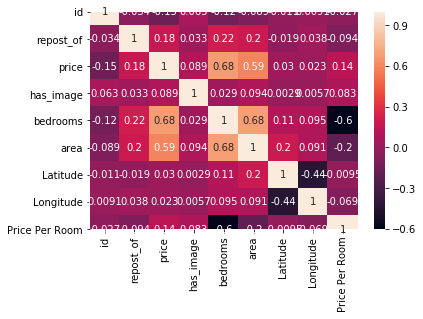

In [178]:
ax = sns.heatmap(sf_cl_area.corr(), annot=True)

### Examining Price by Bedroom and Listing Type

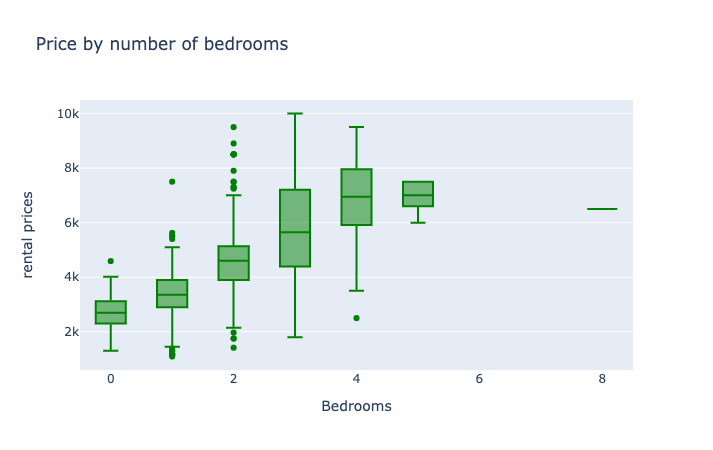

In [274]:
x = sf_cl_area['bedrooms']

trace0 = go.Box(
    y=sf_cl_area['price'],
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    
     
    title="Price by number of bedrooms",
    
    
   
    
    
    yaxis=dict(
        title='rental prices',
        zeroline=False
    ),
    
    xaxis=dict(
        title='Bedrooms',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

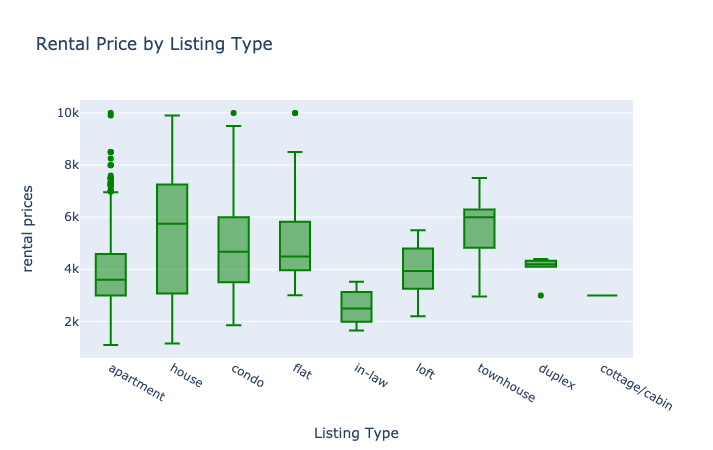

In [276]:
x = sf_cl_area['housing_type']

trace0 = go.Box(
    y=sf_cl_area['price'],
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    title="Rental Price by Listing Type",
    yaxis=dict(
        title='rental prices',
        zeroline=False
    ),
    
    xaxis=dict(
        title='Listing Type',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Predicitive Pricing model - Random Forrest

This step step in the analysis is centered around helping newcomers to the San Francisco apartment rental market identify both underpriced and overpriced apartments. To do so, I considered using many clustering machine learning algorithms but ended up using: SciKitLearn’s Random Forrest regressor to classify and predict apartment prices based on the data already obtained and stored in the craigslist data frame. Given limited time, I chose only four features to pass into the model: # of bedrooms, area (sq/Ft), Longitude and Latitude. Given the four inputs, the model examines all 1100 listings to determine the relationship between price and four variables.  As indicated below, the relationship between bedrooms, area as well as location proved to have a significant impact on price.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [30]:
sf_model = sf_cl_area[['price', 'Latitude', 'Longitude', 'area', 'bedrooms']]# creating a new dataframe containing only numaric columns 
X_train_pr, x_test_pr, Y_train_pr, y_test_pr = train_test_split(sf_model.drop('price', axis=1), sf_model['price']) #splitting the dataframe into test and train sets 
model_pr = RandomForestRegressor(n_estimators=100) #creating the clasifer object 
model_pr.fit(X_train_pr, Y_train_pr) #fitting train and test data 
pred_pr = model_pr.predict(x_test_pr) # predicting price values from test data 

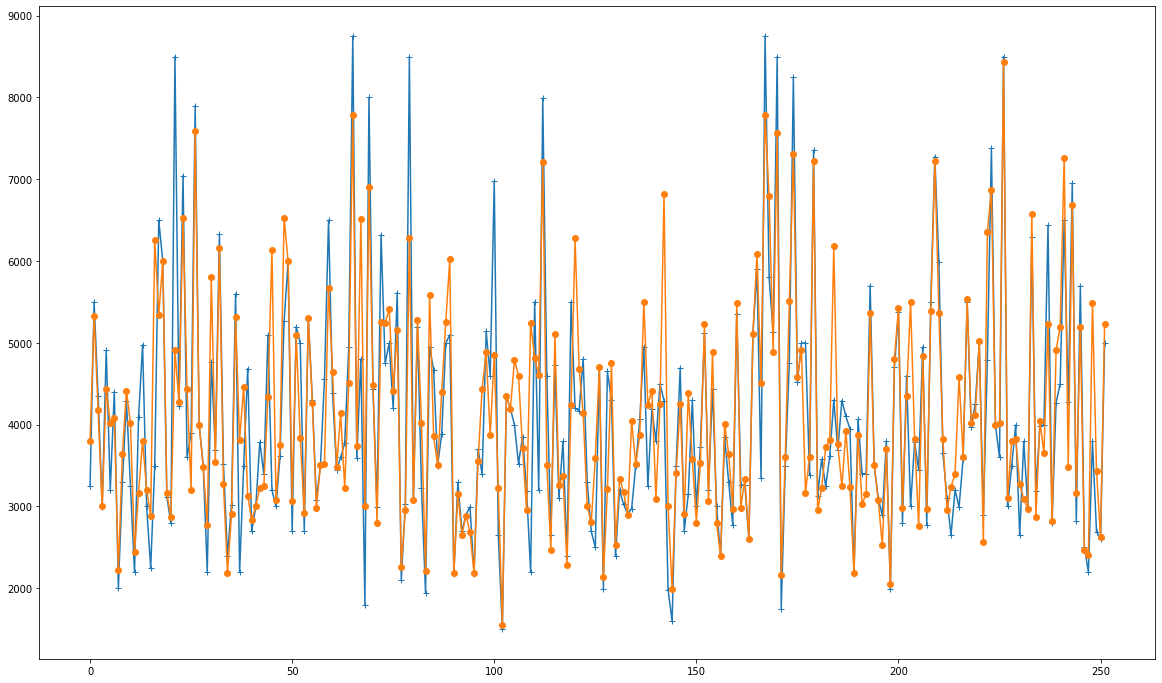

In [31]:
plt.figure(figsize=(20,12)) #X-Axis: number of listings, Y-Axis: Price (actual and predicted)

plt.plot(range(0, y_test_pr.shape[0]), y_test_pr, marker='+') # blue line- plotting original price data 
plt.plot(range(0, pred_pr.shape[0]), pred_pr, marker='o')# orange line- plotting predicted price data 

### Feature importance: Pricing Model 

Looks like the model places the heaviest weight on the number of bedrooms, closely followed by area. Location proved to play a lesser, but still important role in the pricing model. Finally, given the data provided, I’m confident that this model can provide useful predictions given it’s score of .72. That being said, there is unquestionably room for improvement. 

,feature,importance
3,bedrooms,0.385814
2,area,0.331803
0,Latitude,0.154543
1,Longitude,0.127840


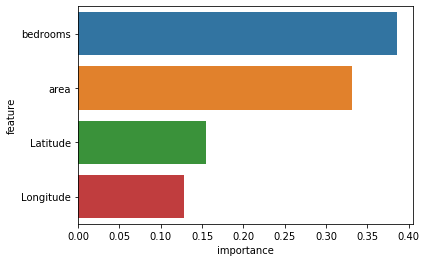

In [32]:
fi = pd.DataFrame({'feature': list(X_train_pr.columns),
                   'importance': model_pr.feature_importances_}).\
                    sort_values('importance', ascending = False)

display(fi)
sns.barplot(x=fi.importance, y=fi.feature)

In [33]:
model_pr.score(x_test_pr, y_test_pr)

0.7204249631066979

### Predicitive area model - Random Forrest

This random forrest model is designed to predict area as opposed to price, all inputs are identical to the pricing model above. 

In [39]:
X_train_ar, x_test_ar, Y_train_ar, y_test_ar = train_test_split(sf_model.drop('area', axis=1), sf_model['area']) 
model_ar = RandomForestRegressor(n_estimators=400)
model_ar.fit(X_train_ar, Y_train_ar)
pred_ar = model_ar.predict(x_test_ar)

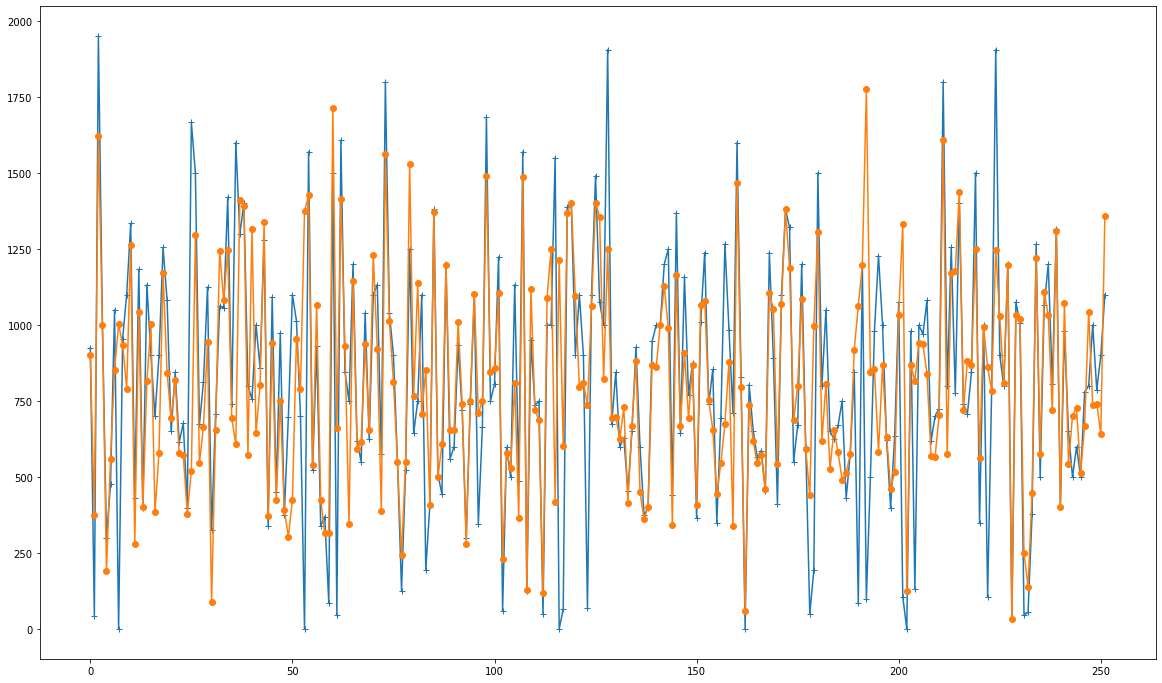

In [40]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test_ar.shape[0]), y_test_ar, marker='+')
plt.plot(range(0, pred_ar.shape[0]), pred_ar, marker='o')

,feature,importance
3,bedrooms,0.432220
0,price,0.267215
1,Latitude,0.173300
2,Longitude,0.127265


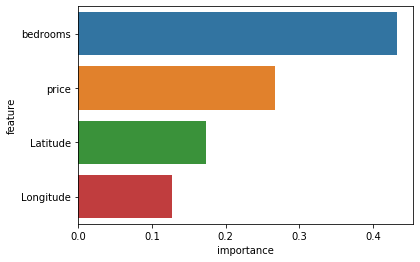

In [41]:
fi_ar = pd.DataFrame({'feature': list(X_train_ar.columns),
                   'importance': model_ar.feature_importances_}).\
                    sort_values('importance', ascending = False)

display(fi_ar)
sns.barplot(x=fi_ar.importance, y=fi_ar.feature)

In [42]:
model_ar.score(x_test_ar, y_test_ar)

0.45148313753776

## Testing the Pricing and Area models

To test the model, I chose an apartment at random from Zillow, not Craigslist, to ensure that my model was not tested using the data I scraped earlier. Given some refinement to the number of regressors, my pricing model successfully and accurately determined the apartment’s rent, within $100 of the listing on Zillow. Given these results, I’m confident that the Random Forrest classifier can help newcomers to the San Francisco market identify both over and underpriced apartments. 

### Pricing Model Test

In [38]:
address = '2790 Pine Street San Francisco, CA 94115' #This is the address of a random apartment in SF not found in my Craigslist Dataset. 

geolocator = Nominatim(user_agent="foursquare_agent") # geocoding the address to obtain Lat, Lon 
location = geolocator.geocode(address)
latitude = location.latitude # lat object of apartiment above 
longitude = location.longitude# lon object of apartiment above 
print(latitude, longitude)

price_pred = model_pr.predict([[latitude, longitude, 775, 2.0]]) # passing the lat, lon, Sq/Ft, # bedrooms into the prediction model. 
print('The predicted price is: ${}'.format(float(price_pred))) #Actual advertised price: $3900 

37.78701471428571 -122.44167157142857
The predicted price is: $3829.37


### Area Model Test

In [43]:
area_pred = model_ar.predict([[3829 , latitude, longitude, 2.0 ]]) #testing the Area model with the same apartment 
print('The predicted area is: {} SQ/ft'.format(float(area_pred)))# actual area is 775 Sq/Ft

The predicted area is: 913.0525 SQ/ft


# Conclusions & Findings 

#### Results - Problem #1: 

Identifying ‘Quality’ neighborhoods: Beginning by targeting quality neighborhoods, I utilized two data sources (Crime and Venue data) to screen quality neighborhoods from poor quality neighborhoods. As a result of cleaning, filtering and combining the datasets, I discovered that neighborhoods such as: Russian Hill, Pacific Heights, Height and Presidio are safe and contain an abundance of venues like parks, gyms and coffee shops. As a result, I’ll be targeting my search in these areas. 


#### Results - Problem #2:

Identifying fairly priced, overpriced and underpriced apartments:  Thanks to the Random Forrest Classification model, I was able to uncover a list of approximately 10 underpriced apartments in each of the neighborhoods listed above. Assuming I was actually in the market for a new apartment, the results yielded should be more than enough to narrow my search to find the perfect apartment. 


#### Conclusion:

Conclusion 
Though simplistic, the methods and data discussed above successfully helped me sort through thousands of apartment listings in the city of San Francisco. By utilizing venue and crime data, we were able to objectively distinguish good quality neighborhoods from poor quality neighborhoods. As a result, identifying underpriced apartments in quality neighborhoods vastly improved the process of searching for new apartments in the city of San Francisco. 


#### Future Directions: 

Given the results of data and models used, I’m confident that it will provide useful results. Regardless, I view my attempts here simply as a proof of concept. To take my analysis to the next level, I’ll need to begin with more metrics that signal neighborhood quality. For instance, I’ll need to quantify each neighborhood’s access easy access to public transportation as well as integrate more venue data from Foursquare and other sources. I’ll also need to integrate this data into the Random Forrest apartment pricing to more accurately determine how neighborhood data affects apartment pricing. Finally, I’ll need to develop a method to visualize the data concisely in one map to make findings as clear as possible to end users. 
